Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# Visualizing Query Results Using the Neptune Workbench

This Notebook was used to create the blog post located [here](https://aws.amazon.com/blogs/database/visualize-query-results-using-the-amazon-neptune-workbench/) and covers the following topics.
1. Intro section
  - Brief discussion of the new feature
2. Loading sample data
3. Gremlin examples
  - Visualization hints
  - Example queries
  - Details view
4. SPARQL examples
  - Visualization hints
  - Example queries
  - Details view
5. Changing the vizualization settings
  - Network layout example
  
  



## Introduction
In this post, we look at the new visualization features recently added to the Amazon Neptune workbench and released on August 12, 2020. These additional capabilities allow you to produce an interactive graph diagram representing the results of your Gremlin and SPARQL queries. We look at some Gremlin-specific features and then do the same for SPARQL. Finally, we look at some of the more advanced ways you can modify the visualizations. As a sidenote, this entire post was produced using the workbench.

### Installing the new features

If you had previously configured the Neptune workbench, all you need to do to pick up the new features is to stop and restart your Jupyter notebook on the [Amazon SageMaker](https://aws.amazon.com/sagemaker) console. If you had not previously installed the workbench, you can launch a new notebook on the Amazon Neptune console. As part of this update, two new example notebooks are installed. These take you on a tour of all the new features in detail for both Gremlin and SPARQL queries. For step-by-step instructions on installing these new features, see the following:

- [Using the Neptune Workbench with Jupyter Notebooks](https://docs.aws.amazon.com/neptune/latest/userguide/notebooks.html)
- [Using Neptune's Getting Started notebooks](https://docs.aws.amazon.com/neptune/latest/userguide/notebooks-get-started.html)
- [Graph visualization in the Neptune workbench](https://docs.aws.amazon.com/neptune/latest/userguide/notebooks-visualization.html)  


After installing the latest workbench, you should check the version number to make sure you have the latest. You can do this with the `%graph_notebook_version` command. You should see a version of 1.27 or higher.

In [ ]:
%graph_notebook_version

It’s also a good idea to make sure that the connection to the Neptune server is working. You can do this with the `%status command`. 

In [ ]:
%status

## Loading some sample data

The Neptune workbench has a `%seed` command that you can use to load the sample data that the queries in this post use. Simply create a new cell in your notebook, enter `%seed`, and run the cell. You’re prompted to enter your Data Model (graph type) and Data set. In this post, we look at both Gremlin and SPARQL queries. If you want to try all the examples, you should install both the Property_Graph and RDF datasets. In both cases, for Data set, choose airports. After you choose Submit, the data starts to load. Loading the data should only take a few seconds.

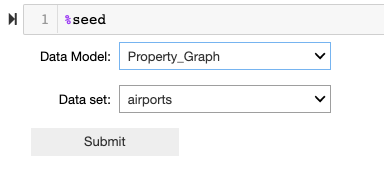

If you would like to load some data now you can use the cell below.

In [ ]:
%seed

## Seeing a visual representation of your Gremlin queries
The property graph data loaded by the `%seed` command is a model of the worldwide air route network. There are vertices for airports, countries and continents. There are edges between airports and between the countries,continents and airports. Each airport has a set of properties and the edges between airports have a property that represent the distance in miles.

You can find the data set at the following GitHub repository: https://github.com/krlawrence/graph
The results of any Gremlin query that returns a `path` can be explored visually. When such queries are run you will see a `Graph` tab in the query results area alongside the `Console` tab. As Gremlin queries allow for `by` modulators to be used to modify the representation of `path` results, there are some rules concerning how results will be rendered visually. These rules are worth remembering. The default behavior for vertex and edge `path` results that are not modified using `by` modulators is to use their labels to annotate the visualization.

In some cases, the Neptune Notebook visualizer can figure out for itself whether an element in a `path` result represents a vertex or an edge and, in some cases, the direction the edge follows. Two simple examples of such queries are shown below. As the first query does not contain any edge information in the `path` result the edge direction cannot be determined automatically by the visualizer. 

`g.V().hasLabel('airport').out().path().limit(5)`  

In this case, the edge direction can be determined as there is an `outE` step included in the query.

`g.V().hasLabel('airport').outE().inV().path().limit(5)`

When no `by` modulators are provided, the visualizer will use the vertex and edge labels to annotate the elements of the diagram. However, when `by` modulators are used, it is not possible for the visualizer in all cases to decide on its own which path elements represent a vertex and which represent an edge. Here is an example of such a query:  

`g.V().hasLabel('airport').outE().inV().path().by('code').by('dist').limit(5)`

It is also not always possible for the visualizer to decide which direction an edge follows. In this case and in the case where `by` modulators are used, the visualizer allows for some special hints to be provided to assist in producing the desired diagram.

### Query visualization hints

You can specify query visualization hints using either `-p` or `--path-pattern` after the `%%gremin` cell "magic". The syntax in general is:

`%%gremlin -p | --path-pattern <comma separated hints>`

 The names of the hints reflect the Gremlin steps most commonly used when traversing between vertices and behave accordingly. The hints used should match the corresponding Gremlin steps used in the query. The hints used can be any combination of those shown in the list below, separated by commas. The list must not contain any spaces between the commas.

- v
- inv
- outv
- e
- ine
- oute



We can provide visualization hints for the query shown earlier as follows:

`%%gremlin -p v,oute,inv`  
`g.V().hasLabel('airport').outE().inV().path().by('code').by('dist').limit(5)`

If you were to run the query with and without the hints present you would observe the differences. Without the hint the visualizer is unable to determine if the `dist` property relates to a vertex or an edge and therefore defaults to using a vertex.

### Adjusting the visualization layout and other settings
You can further adjust many of the visualization settings using the two commands. We will take a look at using those near the end of this post.

- `%graph_notebook_vis_options`
- `%%graph_notebook_vis_options`

## Exploring routes from Palm Springs (PSP) using Gremlin

Given the information above we are ready to start writing some queries and creating some visualizations. Let's start by writing a Gremlin query to find ten routes from the Palm Springs (PSP) airport. When we run the query, by default we see the results shown in text form under the Console tab. Clicking on the Graph tab yields the following picture. The vertices can be moved around by left clicking on them and dragging. You can zoom in and out using the + and - icons or by moving the scroll wheel on a mouse or using the zoom gesture on your laptop or tablet. You can pan (move) the whole diagram around by left clicing on a part of the diagram where there are no vertices or edges and dragging. If you hover the mouse over a vertex a pop up will appear containing the text used to label that vertex in the diagram. If you right click on the picture a menu will appear that allows you to copy the diagram to the clipboard or save it as a PNG file. This is useful if, for example, you create a nice looking diagram and want to share it with others.


In [ ]:
%%gremlin
g.V().has('airport','code','PSP').out().path().by('code').limit(10)

The two pictures below show the results in the Console view and then the same results using the Graph view.

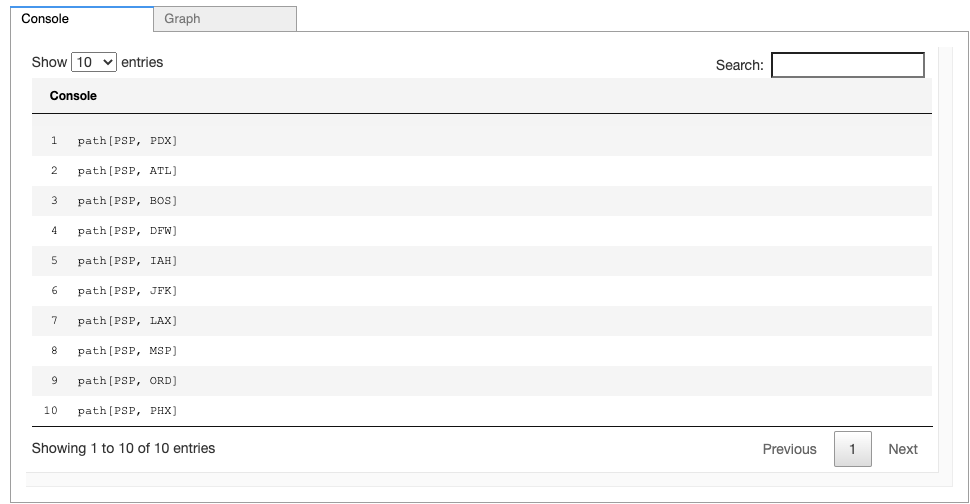

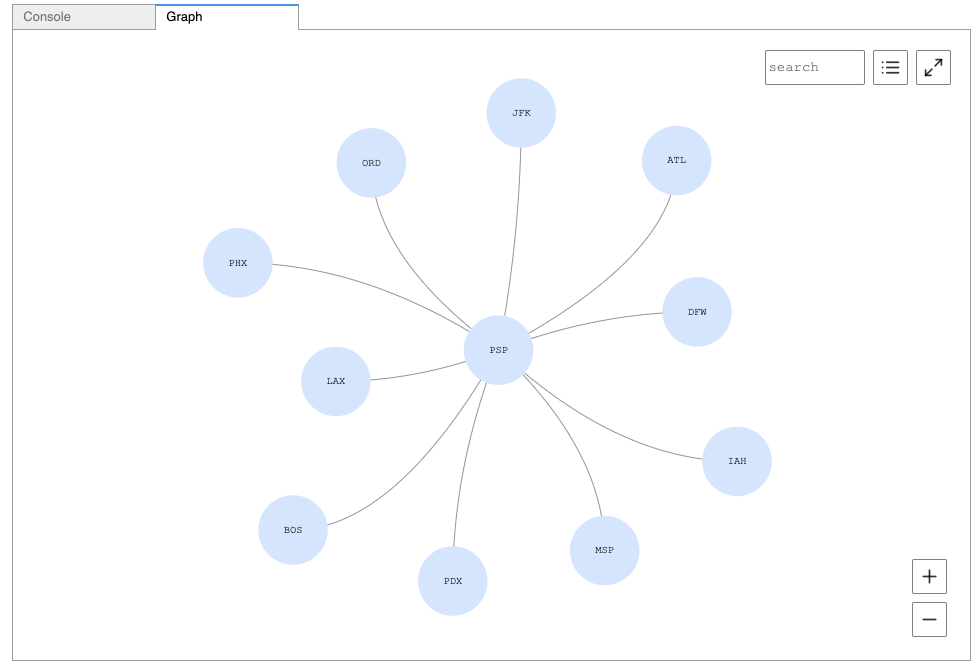

So far our diagram looks quite nice but there are no arrowheads showing us which direction the routes are in. This is because the results of our query do not give the visualizer enough information to figure this out by itself. However, with a little help from us, by way of a hint, we can easiy add arrows to our diagram. This time we add a hint after the cell magic: `%%gremlin -p v,inv`. This tells the visualizer that there will be a vertex followed by another vertex, connected by an outgoing edge. This is all the visualizer needs to know where to put the arrow heads in the diagram.



In [ ]:
%%gremlin -p v,inv
g.V().has('airport','code','PSP').out().path().by('code').limit(10)

Here is the updated diagram with the arrows now added.  



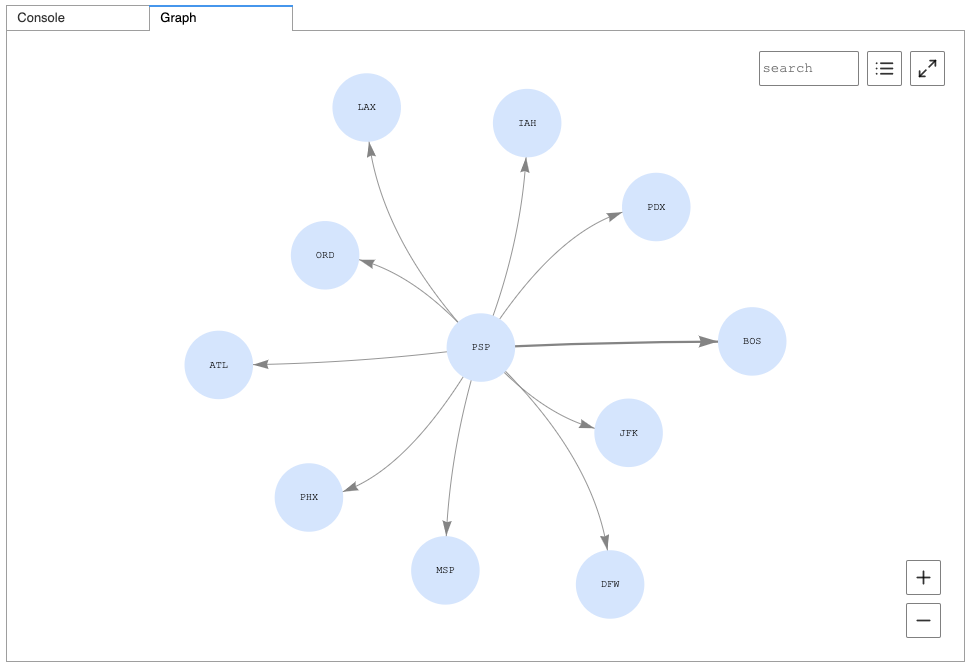

Now all that is missing is to add the route distances as labels on the edges. Let's also change the query so that the vertex labels are city names rather than airport codes. To do that we need to change the query to include explicit references to the edges as well as the vertices. The hint to the visualizer also needs to be changed to let it know that there are edge properties in the result set. Notice that vertex labels are truncated and replaced by and have an ellipsis (...) added if they are longer than ten characters. Hovering over a vertex will cause a tool tip to appear that shows the full text.


In [ ]:
%%gremlin -p v,oute,inv
g.V().has('airport','code','PSP').outE().inV().path().by('city').by('dist').limit(10)

The picture below shows the updated visualization and also a tool tip.  



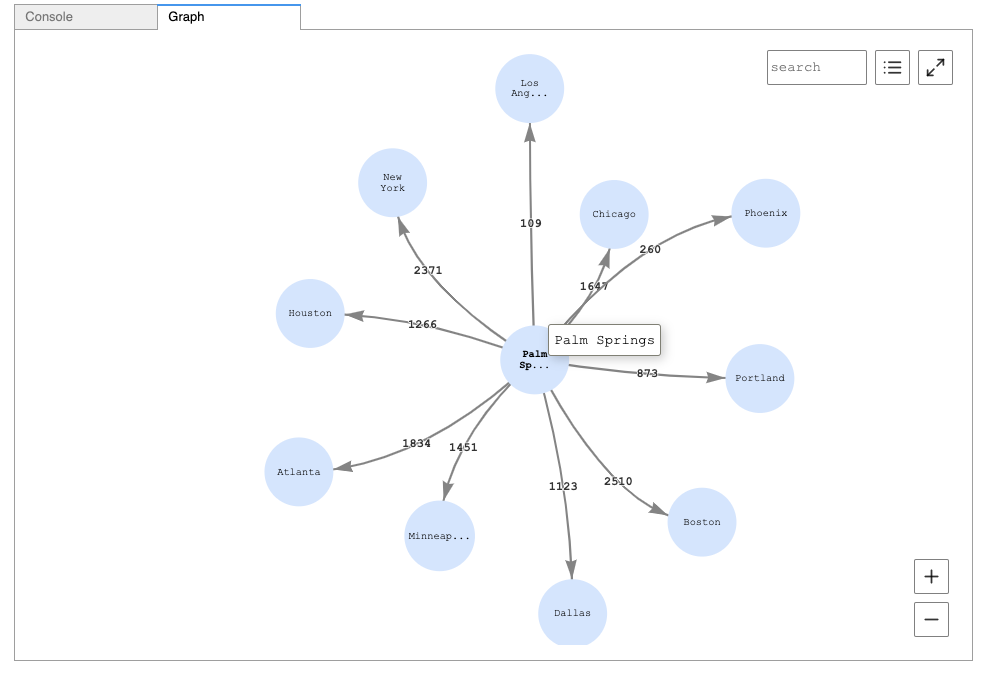

### Introducing the Details view
If your Gremlin query results include a key/value map, as generated by the `valueMap` step, you can hover the mouse over a vertex to see many of the results but it is sometimes nicer to see them in a table. Clicking on a vertex and then selecting the Details view icon will pop up a table showing a nice scrollable list of the results. You can move the pop up window around and make it larger or smaller as suits your preference. The following Gremlin query was used to produce these results.


In [ ]:
%%gremlin -p v,oute,inv
g.V().has('airport','code','PSP').outE().inV().
  path().
    by(valueMap('code','city','region','desc','lat','lon').order(local).by(keys)).
    by('dist').limit(10)


The picture below shows the Details View window containing information about the selected airport.

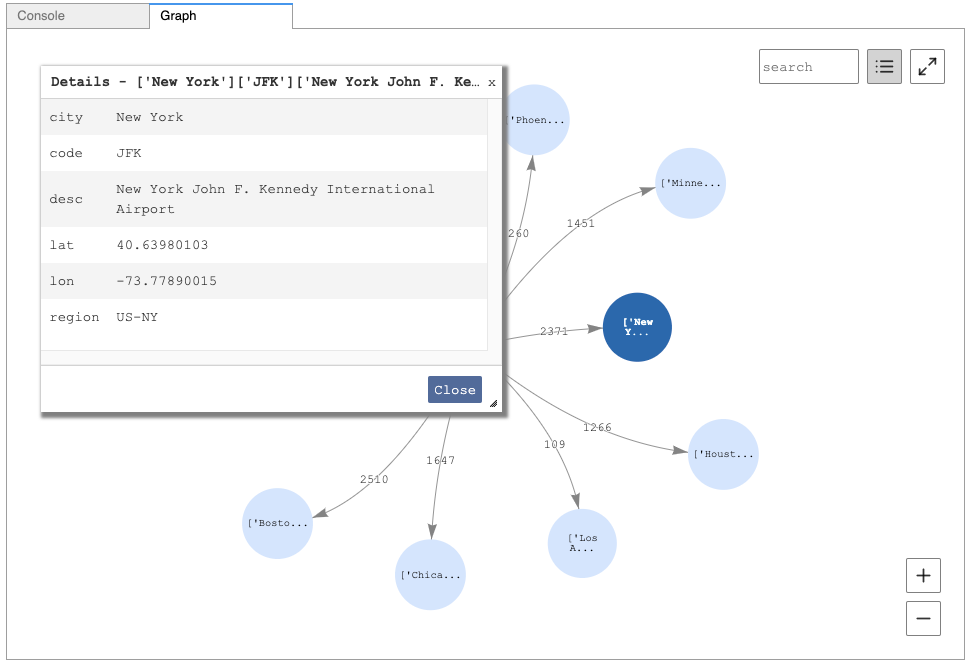


### Routes between New Zealand and Australia
The last Gremlin query we are going to look at for now produces a more interesting result. Imagine we wanted to find all routes that start in New Zealand and end in Australia. The Gremlin query below does just that. When rwe run the query and look at the resultant diagram we can see all the different ways New Zealand and Australia are connected within the data set. Towards the end of this post we will take one more look at a similar Gremlin query and explain how to change the way the visualization is created using a more left to right, hierarchical view setting.

In [ ]:
%%gremlin -p v,inv
g.V().has('country','NZ').out('route').has('country','AU').path().by('city')

The picture below shows the routes that were found in the Graph view.


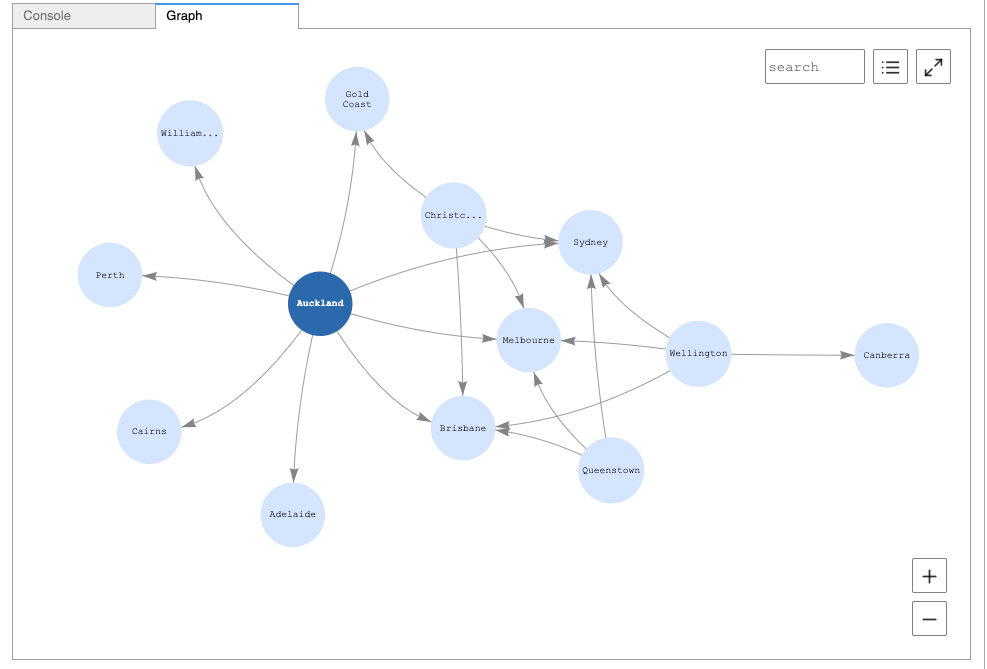

## Seeing a visual representation of your SPARQL queries

The RDF graph data loaded by the `%seed` command is derived from the same data set used in the Gremlin examples above. In this version, RDF triples are used to represent airports, countries, continents and their respective properties. There are additional triples that represent routes between airports and between the countries,continents and airports. The data set takes advantage of RDF _Named Graphs_ to represent the equivalent of edge properties that represent the distance between airports. 

You can find the original data set in CSV form at the following GitHub repository: https://github.com/krlawrence/graph.   

The following SPARQL `PREFIX` shortcuts are helpful when working with this data.

```
PREFIX rdf:   <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:  <http://www.w3.org/2000/01/rdf-schema#>
PREFIX res:   <http://kelvinlawrence.net/air-routes/resource/>
PREFIX prop:  <http://kelvinlawrence.net/air-routes/datatypeProperty/>
PREFIX op:    <http://kelvinlawrence.net/air-routes/objectProperty/>
PREFIX class: <http://kelvinlawrence.net/air-routes/class/>
PREFIX geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>
```

The RDF version of the data set was created by converting the property graph CSV files into N-Quad format files using the tool located at [here](https://github.com/aws/amazon-neptune-csv-to-rdf-converter).

The results of many SPARQL queries can be explored visually. When such queries are run you will see a `Graph` tab in the query results area alongside the other tabs. There are a few requirements that must be followed if you want to have a visualization drawn.

The `SELECT` clause must be of one of two forms:
- `SELECT ?s ?p ?o`
- `SELECT ?subject ?predicate ?object`

You can use other variable names in your queries and in your `SELECT` clauses but only those using the above forms will cause a graph visualization, if appropriate, to be drawn. By default, if present, the `rdfs:label` triple value will be used to label graph components in the visualization.


### Query visualization hints

By default, a visualization will only include triple patterns where `?o` represents another triple resource. In other words, if `?o` is of type `uri` or `bnode` (blank node). All other `?o` binding types, such as `literal` (string, integer etc.), will be considered to be properties on the `?s` node.  These can be seen using the Details view under the `Graph` tab. If you want to also have literal values included in your visualization as vertices, which often is the case, you can specify a hint as shown below. 

`%%sparql --expand-all`

This tells the visualizer to include all `?s ?p ?o` results in the graph diagram. You will see this hint used throughout this notebook along with additional commentary. Feel free to experiment by running queries with and without the hint to see the differences to the visualization.

### Adjusting the visualization layout and other settings
As with Gremlin queries, you can further adjust many of the visualization settings for SPARQL queries using the two commands

- `%graph_notebook_vis_options`
- `%%graph_notebook_vis_options`

## Exploring routes from Palm Springs (PSP) using SPARQL

We are now ready to start writing some SPARQL queries and creating some visualizations that are similar to the Gremlin ones. As we did with Gremlin, let's start by writing a SPARQL  query to find ten routes from the Palm Springs (PSP) airport. When we run a SPARQL query the results by default are shown using a Table view. If the query can be shown visually there will also be a Graph tab. Results from SPARQL queries also have a Raw tab that allows us to see the query in the form it was returned by the query engine. This is similar to the Console view used for Gremlin queries.


In [ ]:
%%sparql

PREFIX prop:  <http://kelvinlawrence.net/air-routes/datatypeProperty/>
PREFIX op:    <http://kelvinlawrence.net/air-routes/objectProperty/>
PREFIX res:   <http://kelvinlawrence.net/air-routes/resource/>


SELECT ?s ?p ?o
WHERE {
    ?s ?p ?o .
    ?s prop:code "PSP" .
    ?s op:route ?o
}
LIMIT 10


The two pictures below show the Table and Graph views after running the query.Notice that so far we just see the unmodified  triples in the Table and Graph view. This is something we will improve upon in the next example.

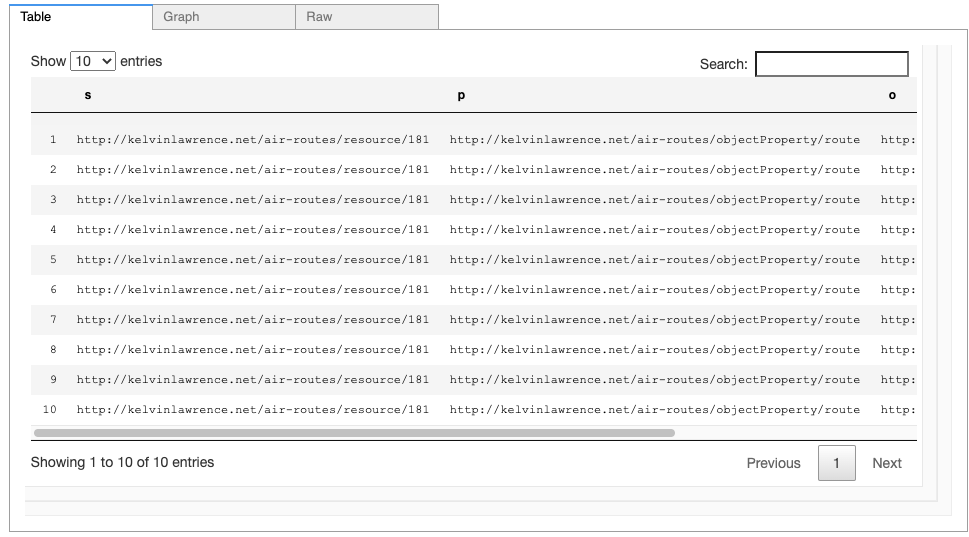

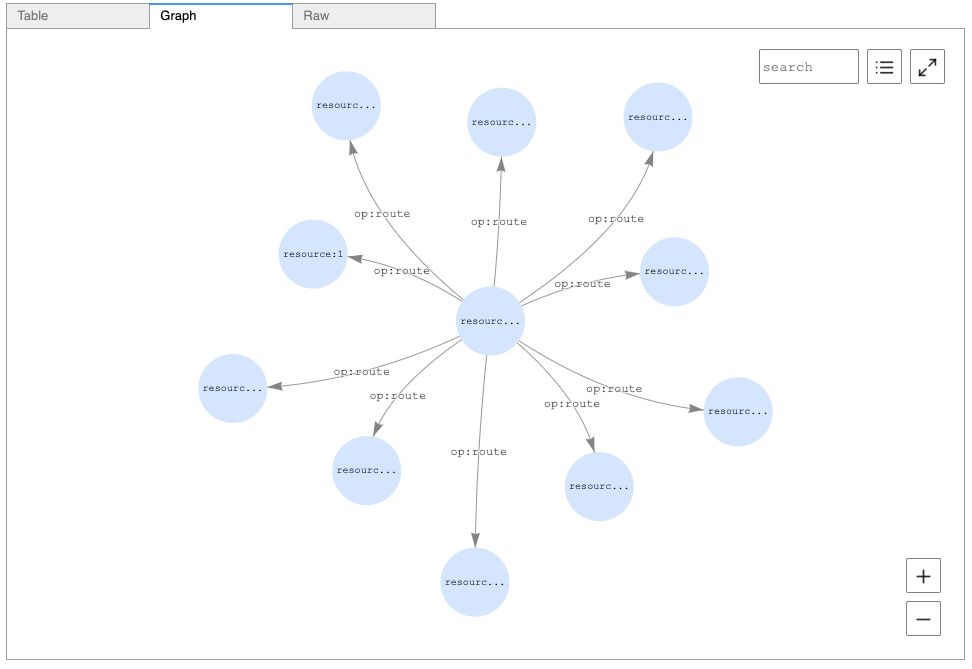

It would make a nicer visualization if we could see the airport codes rather than the fully qualified triple values. We can do that by slightly adjusting the query and giving the visualizer the `--expand-all` hint.

In [ ]:
%%sparql --expand-all
PREFIX prop:  <http://kelvinlawrence.net/air-routes/datatypeProperty/>
PREFIX op:    <http://kelvinlawrence.net/air-routes/objectProperty/>

SELECT ?s ?p ?o
WHERE {
    ?from ?p ?to .
    ?from prop:code "PSP" .
    ?from op:route ?to .
    ?from prop:code ?s .
    ?to prop:code ?o
}
LIMIT 10

The picture below shows the results of running the modified query. This looks a lot nicer and is easier for the human observer to understand.


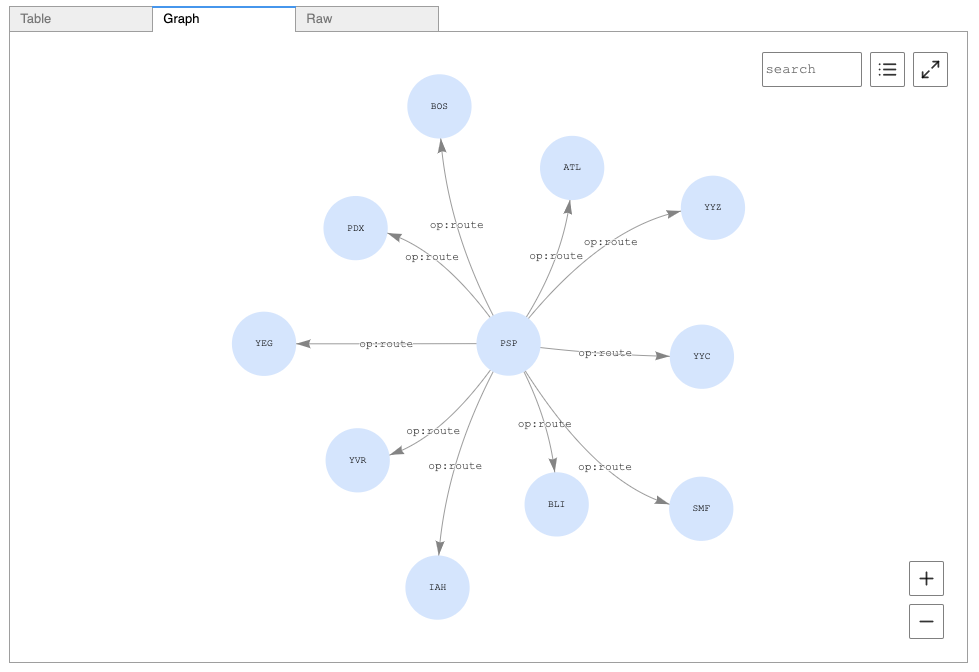

### Visualizing RDF triples as a graph
Sometimes it is nice to see all of the triples releated to a specific vertex in the graph diagramatically. The next query helps us achieve that. We use a `FILTER` step to retrieve just the literal values connected to the PSP vertex. Once again using the `--expand-all` hint tells the visualizer to draw the results as a star graph.

In [ ]:
%%sparql --expand-all

PREFIX prop: <http://kelvinlawrence.net/air-routes/datatypeProperty/>

SELECT ?s ?p ?o 
WHERE {
    ?s ?p ?o . 
    ?s prop:code "PSP" 
    FILTER (strstarts(str(?p),str(prop:)))
} 
LIMIT 10

The picture below shows the PSP airport properties drawn as a star graph.

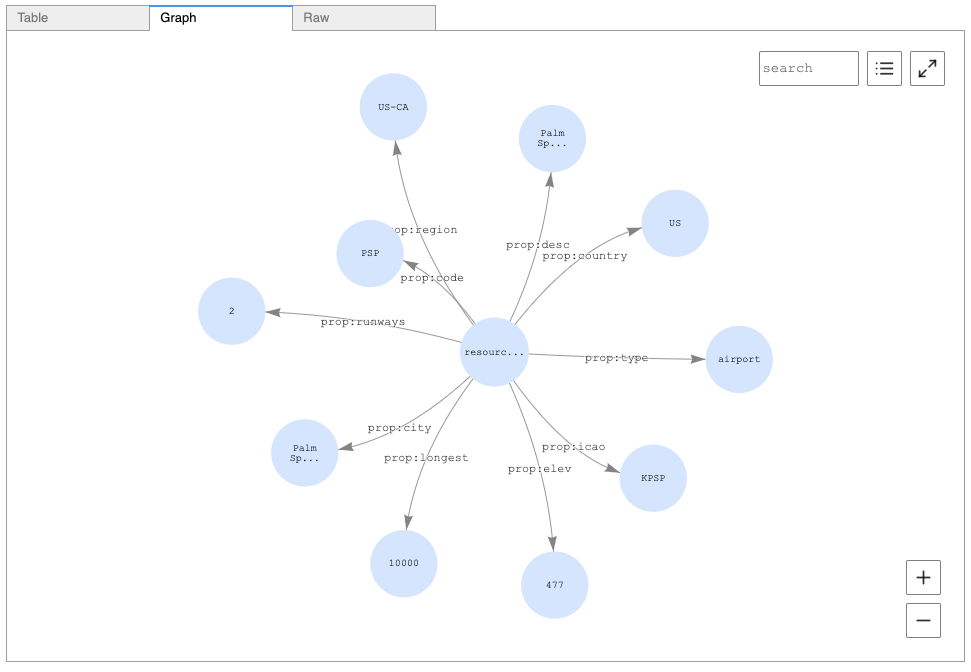

### Using the Details View with SPARQL queries

If we remove the `--expand-all` hint from our previous query the star graph becomes a diagram containing a single vertex. However, the results are still available to us via the Details view as shown below.


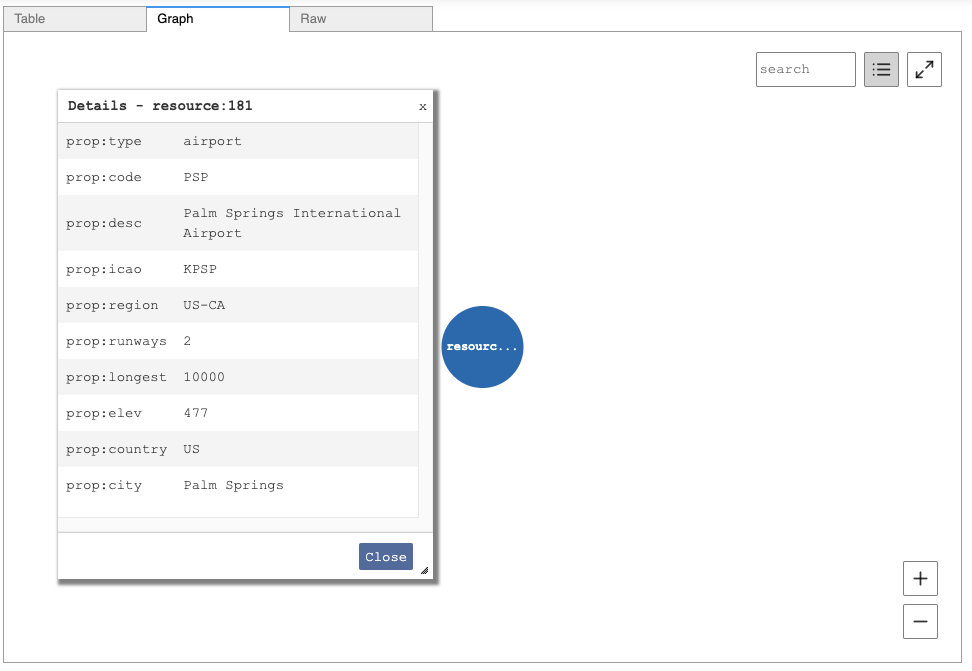

### Adding route distances to the visualization
To make the visualization more interesting let's now change the query so that the visualization includes the route distance as the edge labels. To do this we take advantage of the fact that the RDF data set uses Named Graphs to simulate the same edge properties found in the property graph data. The query is stil quite simple and the results are a lot nicer.

In [ ]:
%%sparql --expand-all
PREFIX prop: <http://kelvinlawrence.net/air-routes/datatypeProperty/> 
PREFIX op:   <http://kelvinlawrence.net/air-routes/objectProperty/> 

SELECT ?s ?p ?o WHERE {
  ?czm prop:code "PSP" .
  ?czm op:route ?dest .
  ?czm prop:code ?s.
  ?dest prop:code ?o.
  GRAPH ?route { ?czm op:route ?dest }
  ?route prop:dist ?p }
ORDER BY ?p
LIMIT 10

The picture below shows the diagram with the distances added.

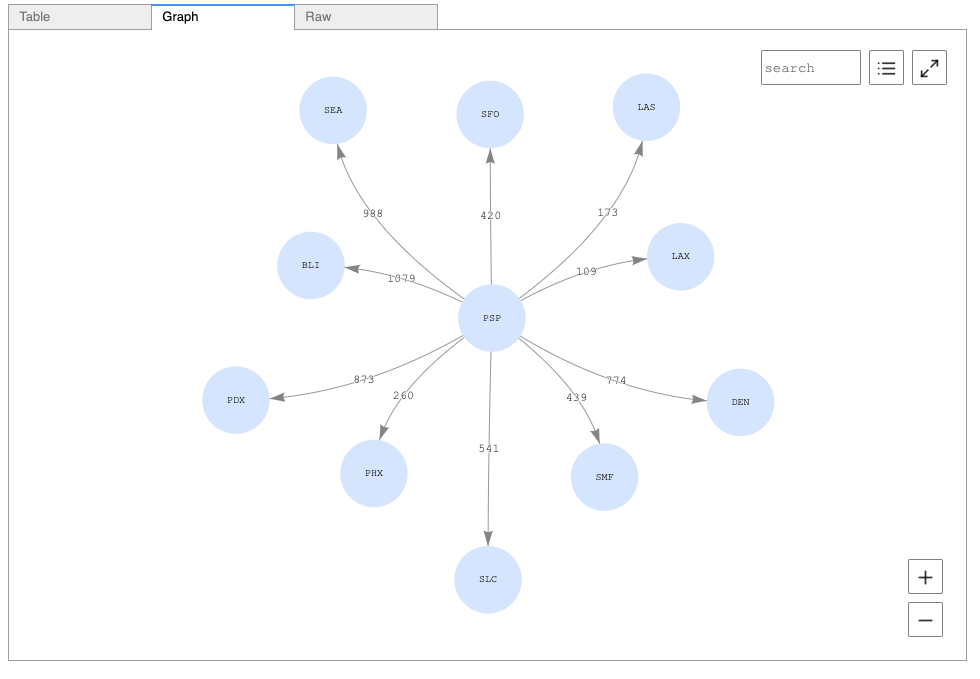

### Routes between New Zealand and Australia - revisited
To finish up our SPARQL examples let's write a query that does the same thing we did above in Gremlin. When the query is run the results look similar to before. While Gremlin and SPARQL each have specififc things they do very well, this demonstrates that a lot of common graph queries can be expressed easily in either language.

In [ ]:
%%sparql --expand-all
PREFIX prop:  <http://kelvinlawrence.net/air-routes/datatypeProperty/>
PREFIX op:    <http://kelvinlawrence.net/air-routes/objectProperty/>

SELECT ?s ?p ?o
WHERE {
    ?from ?p ?to .
    ?from prop:country "NZ" .
    ?to prop:country "AU" .
    ?from op:route ?to .
    ?from prop:city ?s .
    ?to prop:city ?o
}
LIMIT 300

The diagram looks a lot like the one we created earlier using Gremlin.


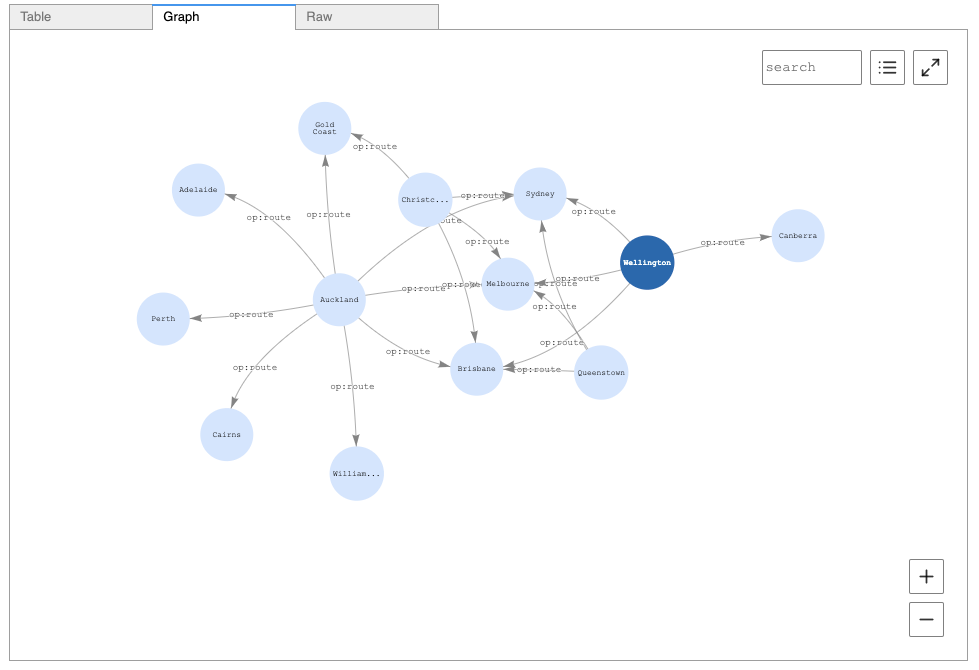

## Changing the visualization settings
The Amazon Neptune Notebooks use an open source library called [Vis.js](https://github.com/visjs) to assist with drawing the graph diagrams. Vis.js provides a rich set of customizable settings. The documentation for most of the visualization settings used in this notebook can be found [here](https://visjs.org/) and in particular the graph network drawing documentation can be found [here](https://visjs.github.io/vis-network/docs/network/).  

To see the current settings used by your notebook you can use the `%graph_notebook_vis_options` line magic command.  To change any of these settings create a new cell, copy the results, make some edits, and use `%%graph_notebook_vis_options` to change them (note the two percent signs indicating a cell magic).

These settings give you a lot of flexibility to customize your visualizations in whichever way you find most pleasing. At any time you can restore the default settings by running a cell containing the command `%graph_notebook_vis_options reset`

### Producing a hierarchical diagram
For some types of query using a hierarchical view is quite pleasing. We can copy the JSON shown below into a cell containing the `%%graph_notebook_vis_options` command. The JSON below contains settings that instruct the visualization engine to produce a more hierarchical view. In this case specifically a left to right view. This type of configuration is useful if the result of your query is tree like in nature. In our case it also works well for looking at airline routes that have a start, some intermediate stops and a destination.

In [ ]:
%%graph_notebook_vis_options
{
  "nodes": {
    "borderWidthSelected": 0,
    "borderWidth": 0,
    "color": {
      "background": "rgba(210, 229, 255, 1)",
      "border": "transparent",
      "highlight": {
        "background": "rgba(9, 104, 178, 1)",
        "border": "rgba(8, 62, 100, 1)"
      }
    },
    "shadow": {
      "enabled": false
    },
    "shape": "circle",
    "widthConstraint": {
      "minimum": 70,
      "maximum": 70
    },
    "font": {
      "face": "courier new",
      "color": "black",
      "size": 12
    }
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "enabled": true,
      "type": "straightCross"
    },
    "arrows": {
      "to": {
        "enabled": true,
        "type": "arrow"
      }
    },
    "font": {
      "face": "courier new"
    }
  },
  "interaction": {
    "hover": true,
    "hoverConnectedEdges": true,
    "selectConnectedEdges": false
  },
  "physics": {
    "hierarchicalRepulsion": {
      "centralGravity": 0
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  },
  "layout": {
    "hierarchical": { 
      "enabled": true,
      "direction": "LR",
      "sortMethod": "directed",
      "edgeMinimization":false }
  }
}


The following Gremlin query looks for up to 5 routes from Palm Springs to Wellington in New Zealand. The pictures that follow show the results of running the query with and without the hierarchical view settings in place.

In [ ]:
%%gremlin -p v,inv,inv,inv
g.V().has('airport','code','PSP').
  repeat(out().simplePath()).
  until(has('code','WLG')).
  path().
    by('code').
  limit(5)



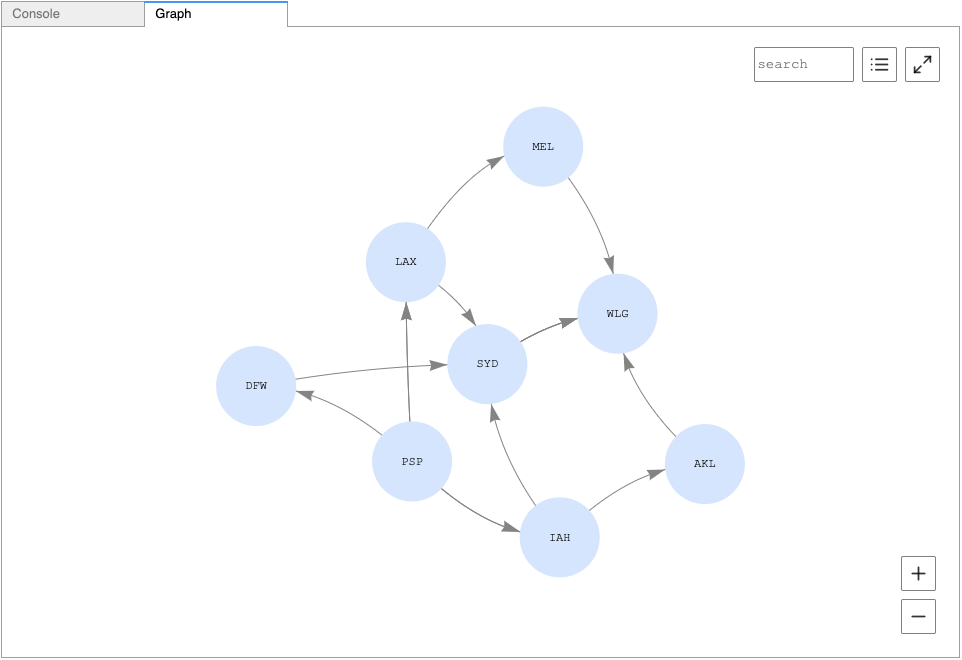

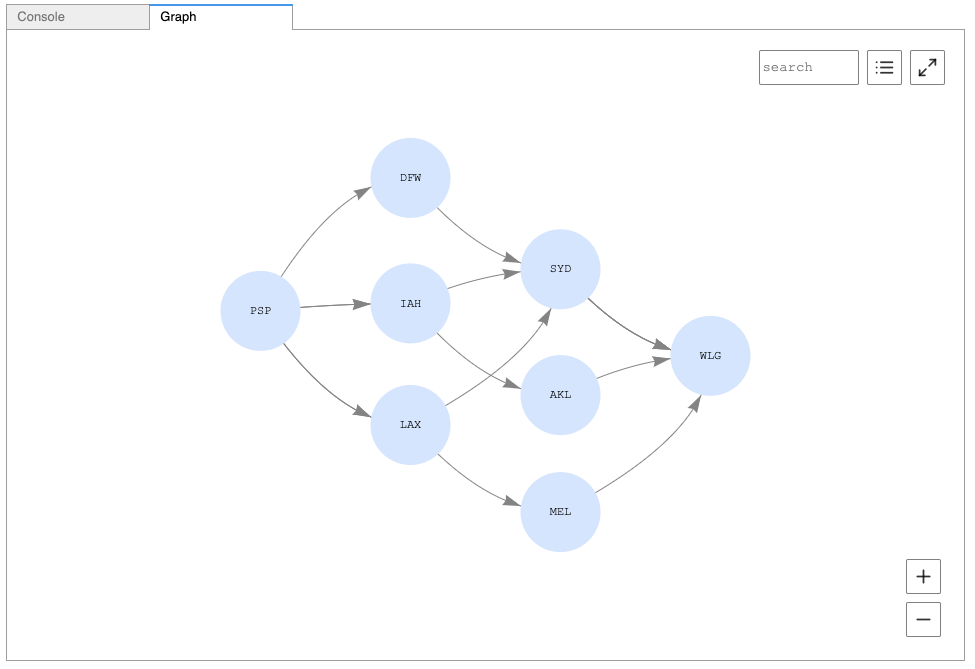

## Summary

In this post, we showcased many of the new visualization features now available in the Neptune workbench. We encourage you to experiment with the sample data in this post or your own data to further explore all of the features. As we mentioned earlier, two new example notebooks are installed along with the workbench that make it easy to get started with query visualizations. Let us know what you think of this new experience. All that is left for now is to wish you happy visual graphing with Neptune!

## About the author
Kelvin Lawrence is a Principal Data Architect focused on Amazon Neptune and many other related services. He has been working with graph databases for many years, is the author of the book [Practical Gremlin](http://www.kelvinlawrence.net/book/PracticalGremlin.html) and is a committer on the Apache TinkerPop project.
